<a href="https://colab.research.google.com/github/votrannhatquang/AI-s-ng-th-7/blob/main/Medical_image_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
model = Sequential()
model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', input_shape = (150,150,3), padding = 'same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 128)     3584      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        36896     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                    

In [4]:
train_data = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [5]:
training_set = train_data.flow_from_directory('/content/drive/MyDrive/anhthuoc', target_size = (150,150), batch_size = 32, class_mode ='categorical')

Found 160 images belonging to 4 classes.


In [6]:
training_set.class_indices

{'thuocanthan': 0, 'thuocgiamdau': 1, 'thuochasot': 2, 'thuockhangsinh': 3}

In [7]:
train = model.fit(training_set, epochs = 20, batch_size = 128, verbose = 1)

Epoch 1/20
5/5 [==============================] - 35s 6s/step - loss: 1.6547 - accuracy: 0.3688
Epoch 2/20
5/5 [==============================] - 24s 5s/step - loss: 1.0682 - accuracy: 0.6375
Epoch 3/20
5/5 [==============================] - 25s 5s/step - loss: 0.1733 - accuracy: 0.9937
Epoch 4/20
5/5 [==============================] - 27s 5s/step - loss: 0.0156 - accuracy: 1.0000
Epoch 5/20
5/5 [==============================] - 26s 5s/step - loss: 2.0230e-05 - accuracy: 1.0000
Epoch 6/20
5/5 [==============================] - 25s 5s/step - loss: 9.0259e-05 - accuracy: 1.0000
Epoch 7/20
5/5 [==============================] - 27s 5s/step - loss: 2.8936e-04 - accuracy: 1.0000
Epoch 8/20
5/5 [==============================] - 27s 5s/step - loss: 1.0014 - accuracy: 0.8438
Epoch 9/20
5/5 [==============================] - 25s 5s/step - loss: 0.1756 - accuracy: 0.9187
Epoch 10/20
5/5 [==============================] - 27s 5s/step - loss: 0.0807 - accuracy: 0.9750
Epoch 11/20
5/5 [==========

In [8]:
Score = model.evaluate(training_set, verbose = 0)
print('Ham mat mat', Score[0])
print('Do chinh xac', Score[1])

Ham mat mat 1.4052874576009344e-05
Do chinh xac 1.0


In [9]:
model.save('MIA.h5')
model_CNN = load_model('MIA.h5')

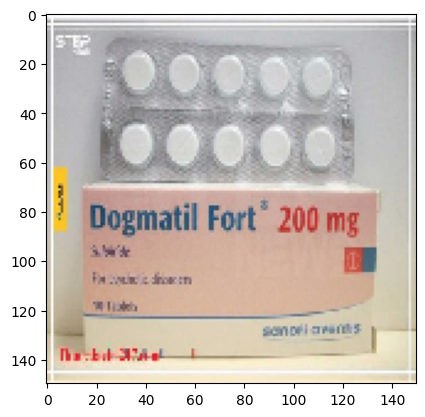

1/1 [==============================] - 0s 75ms/step
Thuốc an thần


In [12]:
filename = "/content/drive/MyDrive/thuocanthan (1).jpg"
img = load_img(filename,target_size = (150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
result = (model_CNN.predict(img).argmax())
if(kq == 0):
    print("Thuốc an thần")
if(kq == 1):
    print("Thuốc giảm đau")
if(kq == 2):
    print("Thuốc hạ sốt")
if(kq == 3):
    print("Thuốc kháng sinh")

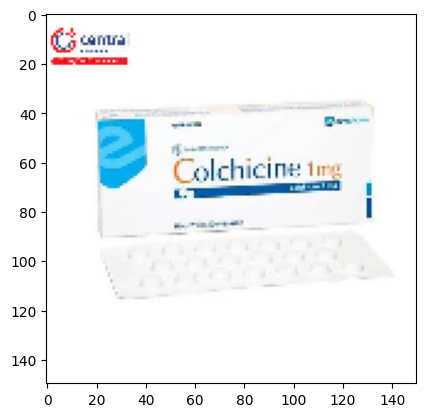

1/1 [==============================] - 0s 80ms/step
Thuốc giảm đau


In [13]:
filename = "/content/drive/MyDrive/thuocgiamdau (5).jpg"
img = load_img(filename,target_size = (150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
result = (model_CNN.predict(img).argmax())
if(kq == 0):
    print("Thuốc an thần")
if(kq == 1):
    print("Thuốc giảm đau")
if(kq == 2):
    print("Thuốc hạ sốt")
if(kq == 3):
    print("Thuốc kháng sinh")

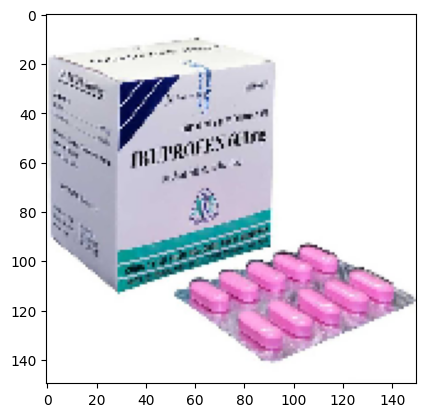

1/1 [==============================] - 0s 53ms/step
Thuốc hạ sốt


In [14]:
filename = "/content/drive/MyDrive/thuochasot (1).jpg"
img = load_img(filename,target_size = (150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
result = (model_CNN.predict(img).argmax())
if(kq == 0):
    print("Thuốc an thần")
if(kq == 1):
    print("Thuốc giảm đau")
if(kq == 2):
    print("Thuốc hạ sốt")
if(kq == 3):
    print("Thuốc kháng sinh")

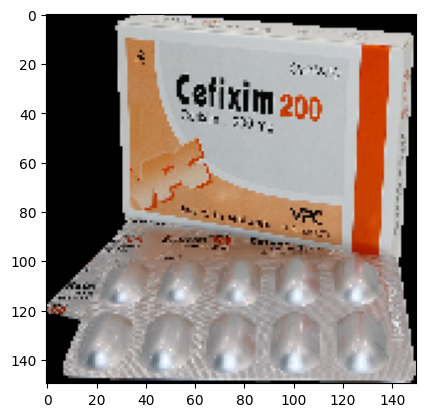

1/1 [==============================] - 0s 103ms/step
Thuốc kháng sinh


In [15]:
filename = "/content/drive/MyDrive/thuockhangsinh (16).png"
img = load_img(filename,target_size = (150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
result = (model_CNN.predict(img).argmax())
if(kq == 0):
    print("Thuốc an thần")
if(kq == 1):
    print("Thuốc giảm đau")
if(kq == 2):
    print("Thuốc hạ sốt")
if(kq == 3):
    print("Thuốc kháng sinh")